In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bike_sharing_data.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print('Casual + Registered = Count? ', ~(df.casual + df.registered - df['cnt']).any())

Casual + Registered = Count?  True


instant column is a record index which does not have any significance in out analysis. So we will drop the column
The varibles casual and registered are summed up to get cnt which is our target variable. Also during prediction we wll not be having these data, so we will drop these two variables which we are not going to use in the model.
We are going to use weekday varible which is derived from dteday, so we will not be using dteday and will drop it.
temp and atemp are directly correlated among each other. We will use temp and drop atemp.

In [9]:
# drop columns instance, dteday, casual, registered and atemp
df.drop(['instant', 'dteday','casual','registered','atemp'], axis=1, inplace=True)

In [10]:
# After droppping the variables checking the columns abnd rows in the dataframe
df.shape

(730, 11)

In [11]:
# identify categorical variables
cat_var = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']

# identify numeric variables
num_var = ['temp', 'hum','windspeed','cnt']

In [12]:
# convert dtype of categorical variables
df[cat_var] = df[cat_var].astype('category')

In [13]:
# get insights of numeric variable
df.describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


In [14]:
# get the insights of categorical variables
df.describe(include=['category'])

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,3,0,1,0,0,1,1
freq,188,365,62,709,105,499,463


Data Disctionary:
Below categorical columns are having following catecteristics and can be mapped with respective values:

season column is having four seasons as (1:spring, 2:summer, 3:fall, 4:winter)
mnth column is having 12 categorical values for months Jan to Dec
weathersit is having for categorical values (1: Clear_FewClouds, 2: Mist_Cloudy, 3: LightSnow_LightRain, 4: HeavyRain_IcePallets)
weekday column having 7 varibles ( 0 to 6 ) denoting (0: Sun, 1: Mon 2: Tue, 3: Wed, 4: Thu, 5: Fri, 6: Sat)
yr, holiday, workingday are having binary values. So we will not map these columns

In [15]:
# mapped the season column
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# mapped the weekday column
df['weekday'] = df['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})


# mapped mnth column values (1 to 12 ) as (jan to dec) respectively
df['mnth'] = df['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'})

#  mapped weathersit column
df['weathersit'] = df['weathersit'].map({1: 'Clear_FewClouds', 2: 'Mist_Cloudy', 3: 'LightSnow_LightRain', 4: 'HeavyRain_IcePallets'})

In [16]:
# Check the data info before proceeding for analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 29.4 KB


In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
newdf.drop("cnt",axis = 1,inplace = True)
catdf = df.drop(newdf.columns,axis=1)
catdf.drop("cnt",axis=1,inplace=True)
len(newdf.columns)

3

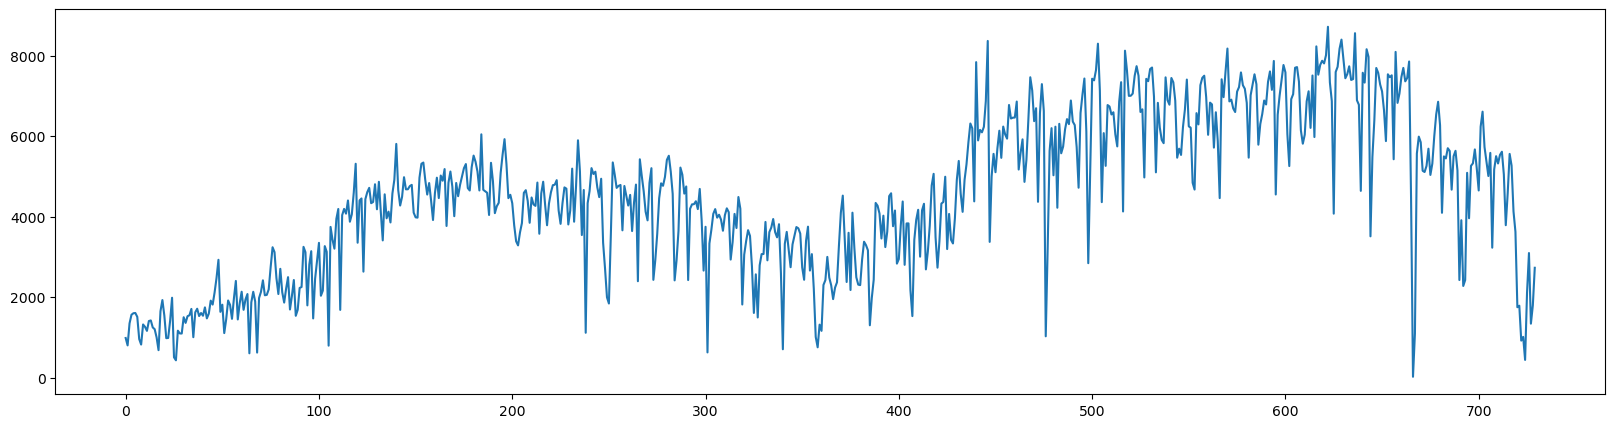

In [18]:
# visualise the pattern of demand (target variable - 'cnt') over period of two years
plt.figure(figsize=(20,5))
plt.plot(df.cnt)
plt.show()

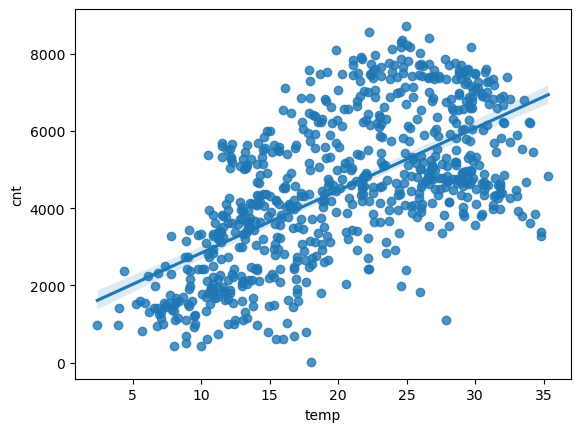

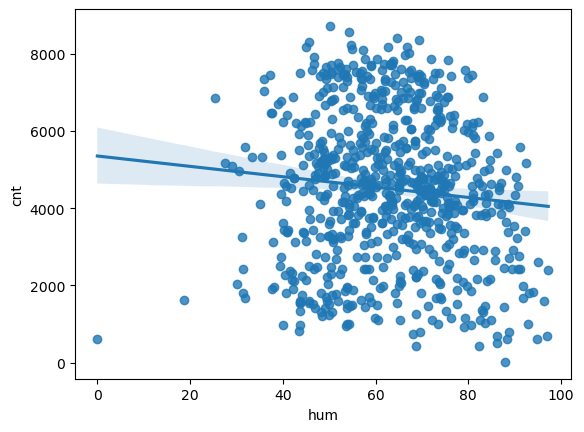

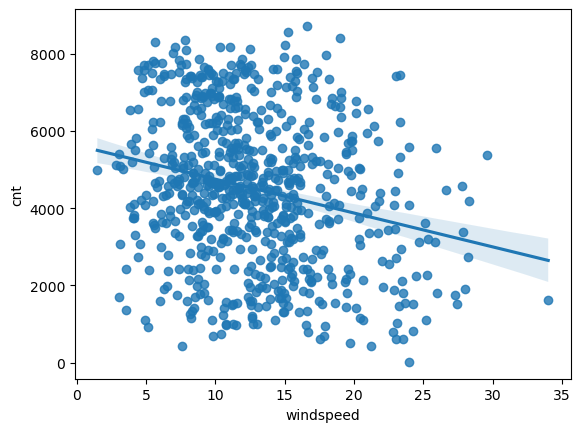

In [19]:
for i, col in enumerate(newdf.columns):
    plt.figure(i)
    sns.regplot(df[col], df["cnt"])

In [20]:
from scipy.stats import pearsonr
# Apply the pearsonr()
for i in newdf.columns:
    corr, _ = pearsonr(df[i], df['cnt'])
    print(i,'Pearsons correlation: %.3f' % corr)

temp Pearsons correlation: 0.627
hum Pearsons correlation: -0.099
windspeed Pearsons correlation: -0.235


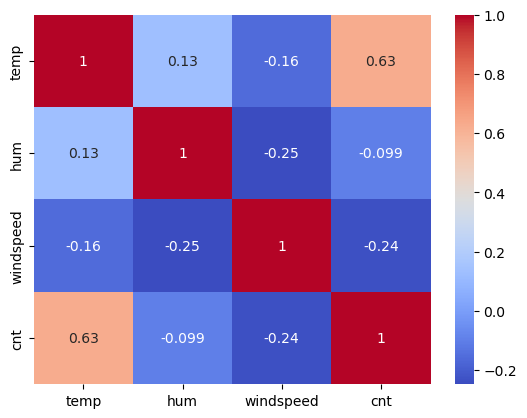

In [21]:
# look at the correlaltion between continous varibales using heat map
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

We could infer follwing observation:

A positive correalation observed between cnt and temp (0.63)
A Negative correlation observed for cnt with hum and windspeed (-0.099 and -0.24)

In [27]:
import scipy.stats
from scipy import stats
def select_cat(cat):
    grouped_test2=df[[cat, 'cnt']].groupby([cat])
    f_val, p_val = stats.f_oneway(*(grouped_test2.get_group(i)['cnt'] for i in df[cat].unique())) 
    print("f_statistics:",f_val,p_val)
    dfn1=len(df[cat].unique())-1
    dfd1=len(df[cat].index)-len(df[cat].unique())
    print("degree of freedom:",dfn1,dfd1)
    f_crit=scipy.stats.f.ppf(q=1-.05, dfn=dfn1, dfd=dfd1)
    print("f_critical:",f_crit)
    print(p_val,0.05,p_val>0.05)
    if f_val>f_crit and p_val<0.05:
        print(cat,"attribute accepted")
        print("_______________________________")
        return False
    else:
        print(cat,"attribute rejected")
        print("_______________________________")
        return True
    

select_cat("season")

f_statistics: 127.74982448889484 1.8949199151618056e-66
degree of freedom: 3 726
f_critical: 2.6171699632357717
1.8949199151618056e-66 0.05 False
season attribute accepted
_______________________________


False

In [29]:
catdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
dtypes: category(7)
memory usage: 6.5 KB


In [28]:
for i in catdf:
    select_cat(i)

f_statistics: 127.74982448889484 1.8949199151618056e-66
degree of freedom: 3 726
f_critical: 2.6171699632357717
1.8949199151618056e-66 0.05 False
season attribute accepted
_______________________________
f_statistics: 349.8646524013491 4.7453742072661526e-64
degree of freedom: 1 728
f_critical: 3.8542639095582962
4.7453742072661526e-64 0.05 False
yr attribute accepted
_______________________________
f_statistics: 41.6101810747467 1.1734854881267743e-69
degree of freedom: 11 718
f_critical: 1.801975150183072
1.1734854881267743e-69 0.05 False
mnth attribute accepted
_______________________________
f_statistics: 3.4586684715986555 0.06332412651800734
degree of freedom: 1 728
f_critical: 3.8542639095582962
0.06332412651800734 0.05 True
holiday attribute rejected
_______________________________
f_statistics: 0.7972296374429554 0.5722198399262313
degree of freedom: 6 723
f_critical: 2.1111018554565395
0.5722198399262313 0.05 True
weekday attribute rejected
_______________________________
f_s

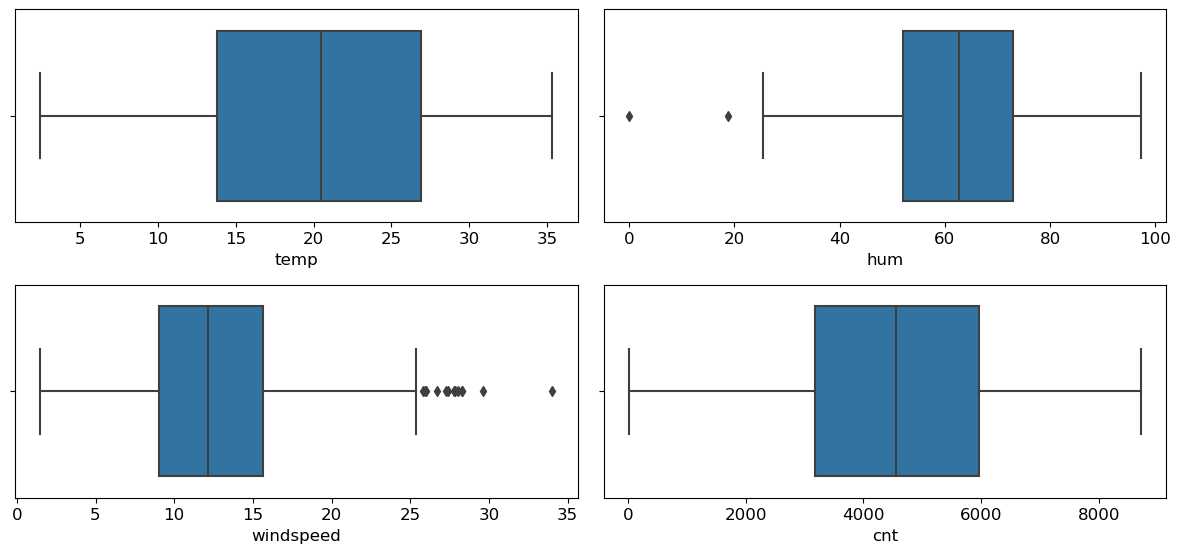

In [30]:
# selecting numerical variables
var = df.select_dtypes(exclude = 'category').columns

# Box plot
col = 2
row = len(var)//col+1

plt.figure(figsize=(12,8))
plt.rc('font', size=12)
for i in list(enumerate(var)):
    plt.subplot(row, col, i[0]+1)
    sns.boxplot(df[i[1]])    
plt.tight_layout()   
plt.show()


Insights:

From the above plots it could be observed that hum and windspeed are having few outliers.

In [31]:
# get percentage outlier for hum and windspeed

# function to get outlier percentage
def percentage_outlier(x):
    iqr = df[x].quantile(0.75)-df[x].quantile(0.25)
    HL = df[x].quantile(0.75)+iqr*1.5
    LL = df[x].quantile(0.25)-iqr*1.5
    per_outlier = ((df[x]<LL).sum()+(df[x]>HL).sum())/len(df[x])*100
    per_outlier = round(per_outlier,2)
    return(per_outlier)

print('Percentage of outlier (hum): ', percentage_outlier('hum'))
print('Percentage of outlier (windspeed): ', percentage_outlier('windspeed'))

Percentage of outlier (hum):  0.27
Percentage of outlier (windspeed):  1.78


Insights:

Percentage of outlier for hum and windspeed are 0.27 and 1.78 respectively.
As these percentage is low, and we can see there is no significant abnormal outlier value. So we will leave it as it is.

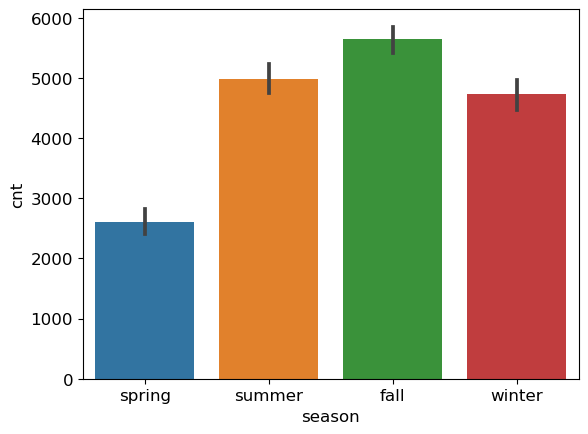

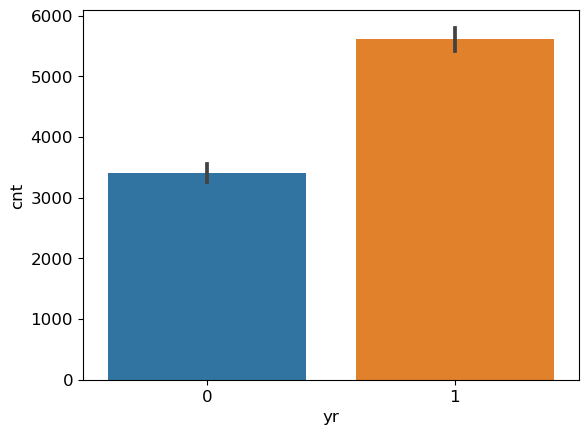

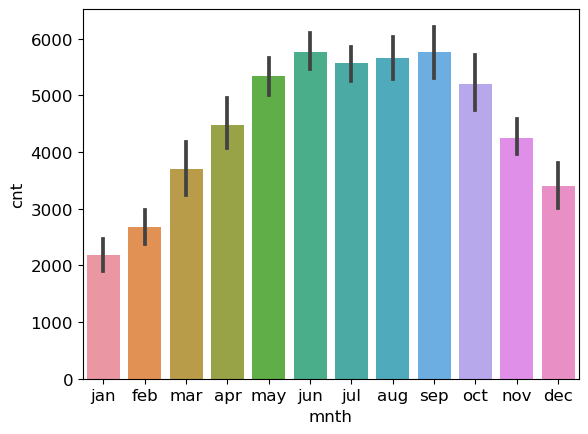

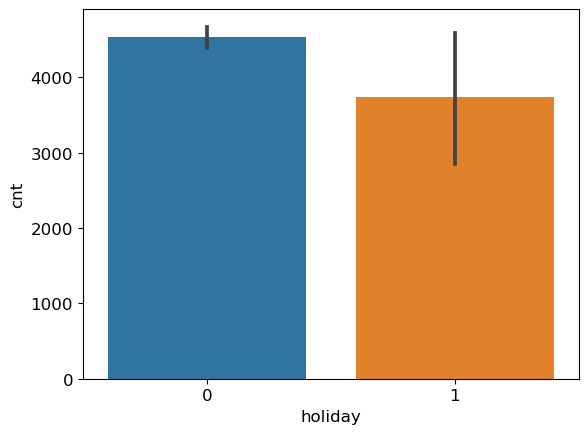

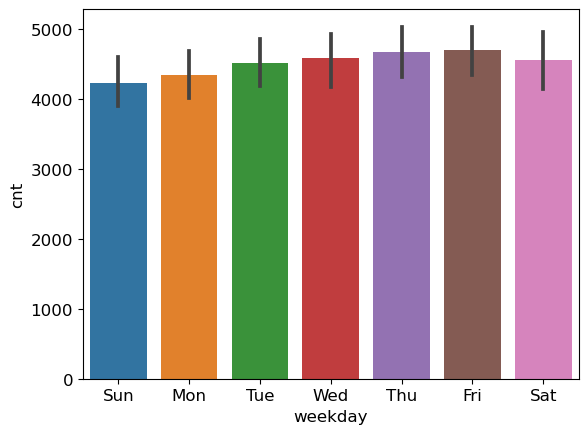

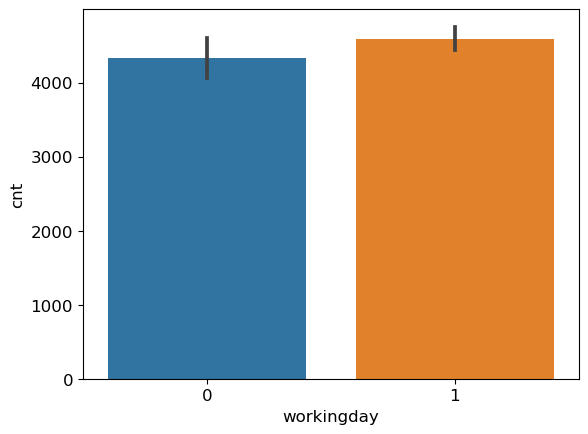

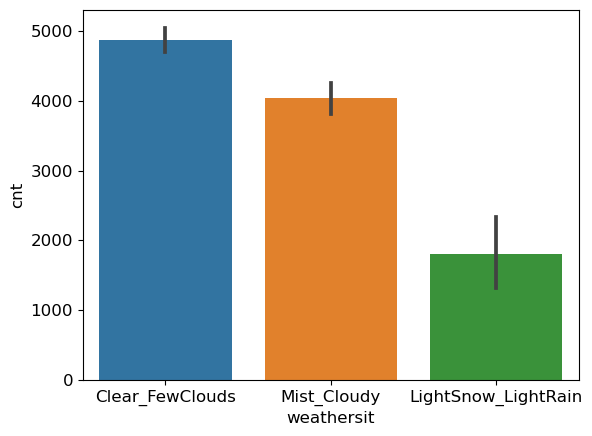

In [32]:
for i, col in enumerate(catdf.columns):
    plt.figure(i)
    sns.barplot(df[col], df['cnt'])

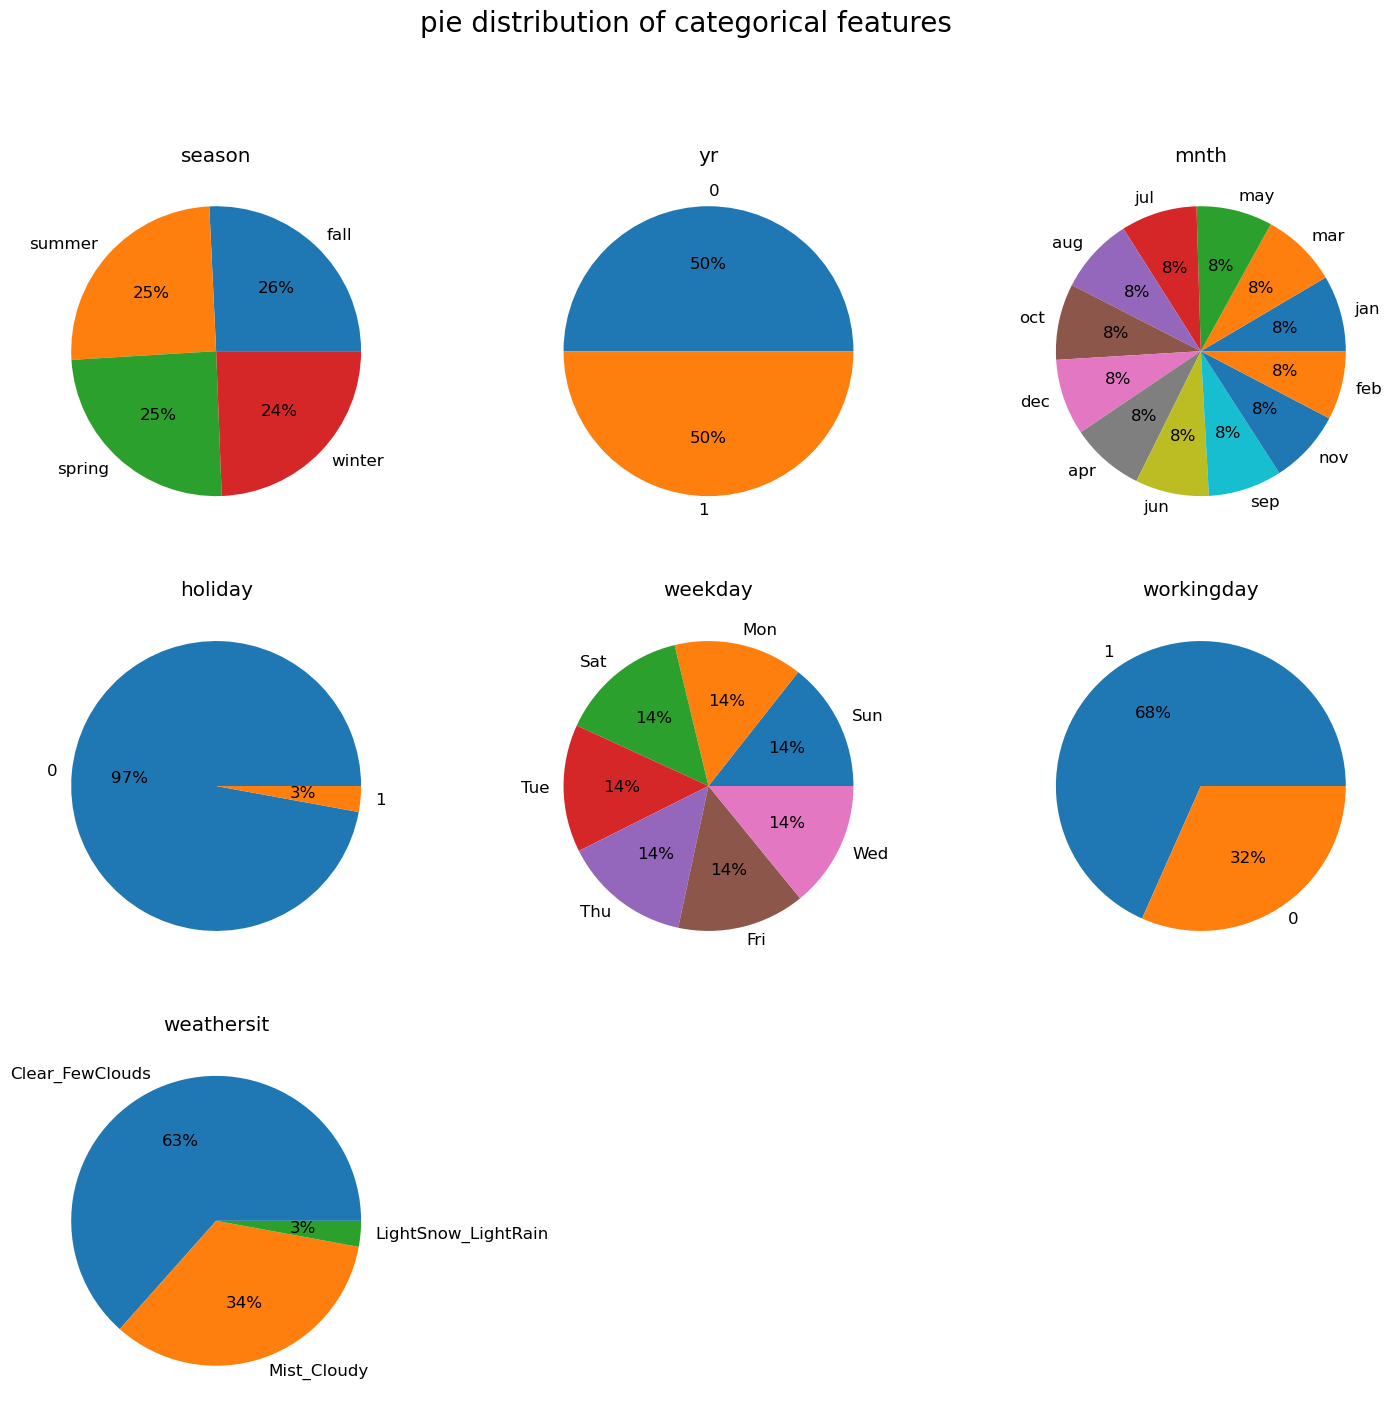

In [33]:
df_piplot = df.select_dtypes(include='category')
plt.figure(figsize=(18,16))
plt.suptitle('pie distribution of categorical features', fontsize=20)
for i in range(1,df_piplot.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(df_piplot.columns.values[i-1])
    values=df_piplot.iloc[:,i-1].value_counts(normalize=True).values
    index=df_piplot.iloc[:,i-1].value_counts(normalize=True).index
    plt.pie(values,labels=index,autopct='%1.0f%%')
# plt.tight_layout(pad = 0.5)
plt.show()

Seasons: We could see business was operating similar days in all four seasons.
Yr: Number of days operation in both the year are almost same.
Month: We could see business was operating similar days in all 12 months.
Holiday: Business was operating in 3% days of holiday
weekdays: We could see business was operating similar percentage in all weekdays.
Workingday: Bisuness was operating in 68% in workign days and 32% in nonworking days.
Weathersit: From the above analaysis it is being observed that there is no data for 4th category of weathersit i.e Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.May be the company is not operating on those days or there was no demand of bike.

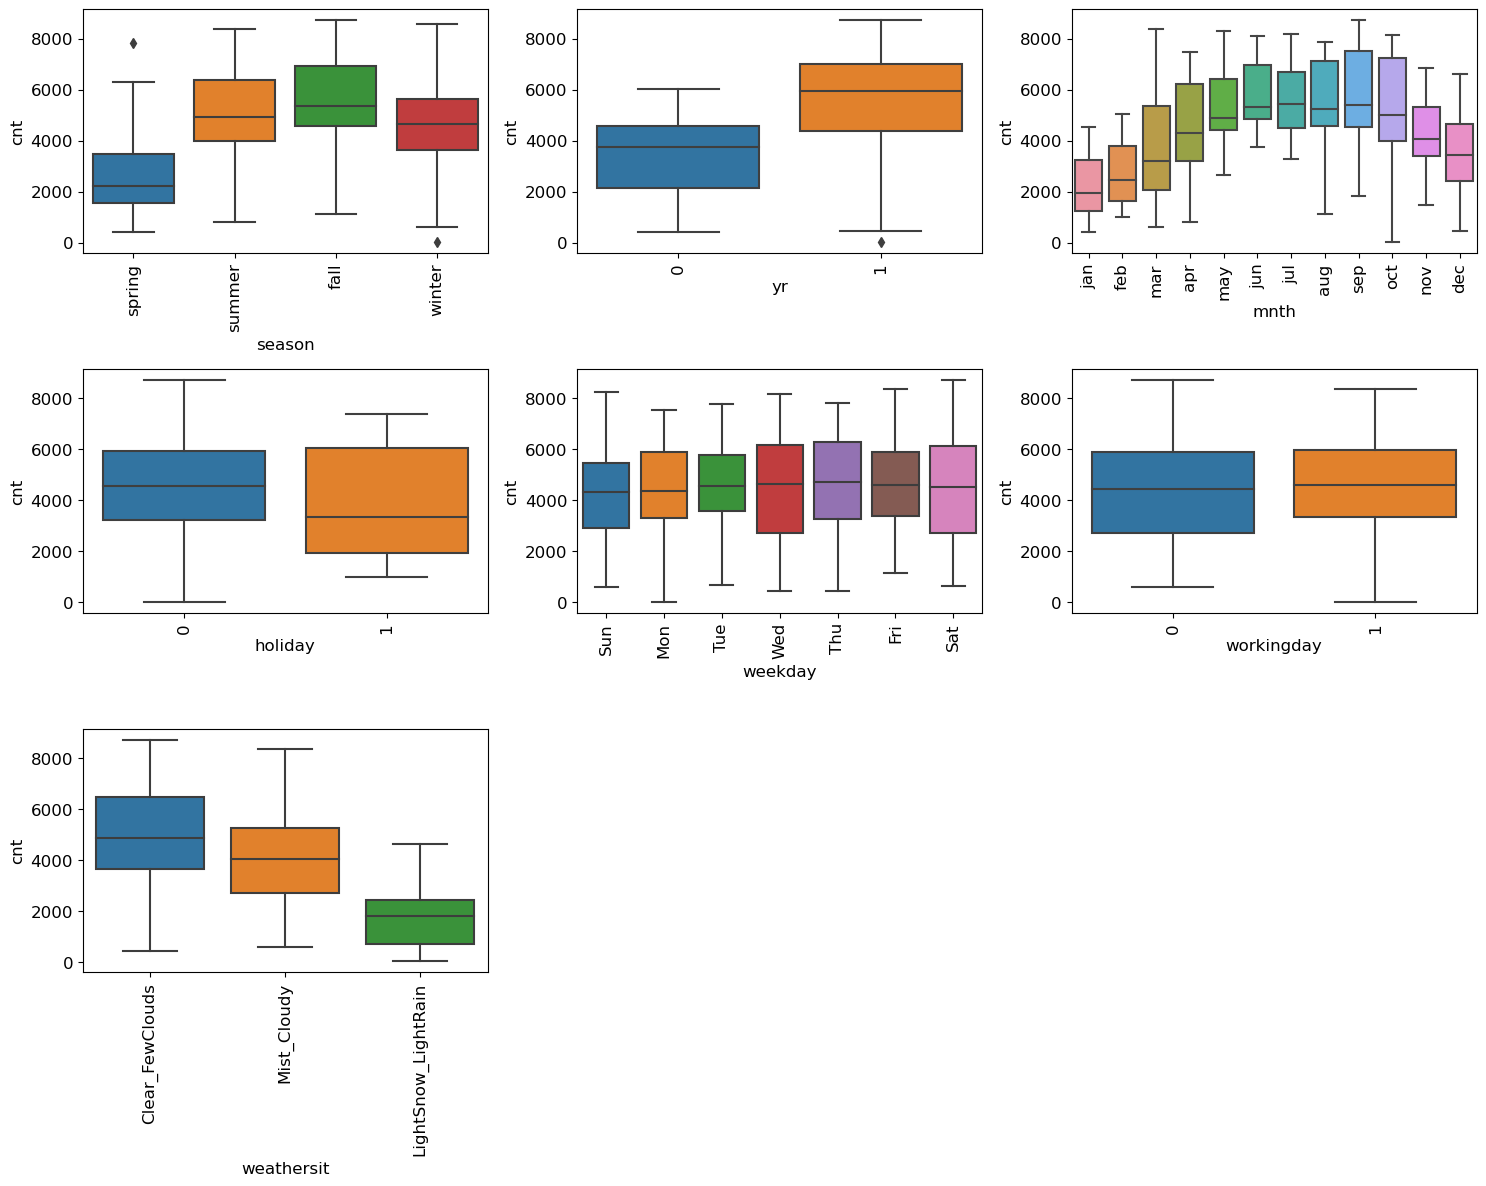

In [34]:
# Box plot for categorical variables
col = 3
row = len(cat_var)//col+1

plt.figure(figsize=(15,12))
for i in list(enumerate(cat_var)):
    plt.subplot(row,col,i[0]+1)
    sns.boxplot(x = i[1], y = 'cnt', data = df)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1)    
plt.show()

Insights:
Q. From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

Answer:

The demand of bike is less in the month of spring when compared to other seasons.
The demand bike increased in the year 2019 when compared with year 2018.
Month Jun to Sep is the period when bike demand is high. The Month Jan is the lowest demand month.
Bike demand is less in holidays in comparison to not being a holiday.
The demand of bike is almost similar throughout the weekdays.
There is no significant change in bike demand with working day and non-working day.
The bike demand is high when weather is clear and Few clouds however demand is less in case of Lightsnow and light rainfall. We do not have any data for Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, so we can not derive any conclusion. May be the company is not operating on those days or there is no demand of bike.

# Step - 3. Data Preparation

3.1 Creating of dummy variables

In [35]:
# get dummy variables for season, weekday, mnth and weathersit
dummy_vars = pd.get_dummies(df[['season','weekday','mnth','weathersit']],drop_first=True)

# concat the dummy df with original df
df = pd.concat([df,dummy_vars], axis = 1)

# drop season column
df.drop(['season','weekday','mnth','weathersit'], axis=1, inplace=True)

df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# check data frame
df.shape

(730, 29)

In [37]:
# Check datafrmae
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   yr                              730 non-null    category
 1   holiday                         730 non-null    category
 2   workingday                      730 non-null    category
 3   temp                            730 non-null    float64 
 4   hum                             730 non-null    float64 
 5   windspeed                       730 non-null    float64 
 6   cnt                             730 non-null    int64   
 7   season_summer                   730 non-null    uint8   
 8   season_fall                     730 non-null    uint8   
 9   season_winter                   730 non-null    uint8   
 10  weekday_Mon                     730 non-null    uint8   
 11  weekday_Tue                     730 non-null    uint8   
 12  weekday_Wed           

In [38]:
# Convert categorical columns to numeric 
df[['yr','holiday','workingday']]= df[['yr','holiday','workingday']].astype('uint8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    uint8  
 1   holiday                         730 non-null    uint8  
 2   workingday                      730 non-null    uint8  
 3   temp                            730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   season_summer                   730 non-null    uint8  
 8   season_fall                     730 non-null    uint8  
 9   season_winter                   730 non-null    uint8  
 10  weekday_Mon                     730 non-null    uint8  
 11  weekday_Tue                     730 non-null    uint8  
 12  weekday_Wed                     730 

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Split train test dataset
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 10)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
# Scaling of train set

# instantiate an object
scaler = MinMaxScaler()

# fit and transform on training data
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
72,0,0,1,0.298094,0.393891,0.236118,0.194978,0,0,0,...,0,0,0,0,0,0,0,0,0,0
510,1,0,0,0.778657,0.694105,0.364071,0.737052,1,0,0,...,1,0,0,0,0,0,0,0,0,0
700,1,0,0,0.327249,0.809877,0.210252,0.509236,0,0,1,...,0,0,0,0,0,0,0,1,1,0
264,0,0,1,0.694699,0.910249,0.217975,0.526862,0,1,0,...,0,0,0,0,1,0,0,0,1,0
577,1,0,1,0.811368,0.624004,0.244886,0.863093,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
# check test dataset before scaling
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1,0,0,24.429153,86.5417,14.291100,4459,0,1,0,...,0,0,1,0,0,0,0,0,0,1
374,1,0,1,12.656536,64.6522,12.565984,3598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,1,29.622500,39.6250,6.874736,5362,0,1,0,...,0,0,1,0,0,0,0,0,0,0
529,1,0,1,26.581653,56.9583,17.000111,7363,1,0,0,...,0,1,0,0,0,0,0,0,0,0
233,0,0,1,28.358347,47.0000,18.542250,4758,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
# transform test dataset 
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1,0,0,0.652175,0.863516,0.393568,0.486297,0,1,0,...,0,0,1,0,0,0,0,0,0,1
374,1,0,1,0.276477,0.584521,0.340487,0.382349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,1,0.817910,0.265533,0.165370,0.595316,0,1,0,...,0,0,1,0,0,0,0,0,0,0
529,1,0,1,0.720868,0.486457,0.476922,0.836895,1,0,0,...,0,1,0,0,0,0,0,0,0,0
233,0,0,1,0.777567,0.359532,0.524373,0.522395,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [45]:
# Creating X and y data dataframe for train set
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weekday_Mon,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
72,0,0,1,0.298094,0.393891,0.236118,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
510,1,0,0,0.778657,0.694105,0.364071,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
700,1,0,0,0.327249,0.809877,0.210252,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
264,0,0,1,0.694699,0.910249,0.217975,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
577,1,0,1,0.811368,0.624004,0.244886,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
# Creating X and y data dataframe for test set
y_test = df_test.pop('cnt')
X_test = df_test

X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weekday_Mon,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
566,1,0,0,0.652175,0.863516,0.393568,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
374,1,0,1,0.276477,0.584521,0.340487,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,1,0.817910,0.265533,0.165370,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
529,1,0,1,0.720868,0.486457,0.476922,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
233,0,0,1,0.777567,0.359532,0.524373,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a linear regression object
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared score for the training and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# calculate root mean squared error (RMSE)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Print the R-squared score for the training and test data
print("R-squared score on train set:", r2_train)
print("R-squared score on test set:", r2_test)

print("RMSE on train set:", rmse_train)
print("RMSE on test set:", rmse_test)

R-squared score on train set: 0.8129692141621065
R-squared score on test set: 0.8081242039651113
RMSE on train set: 0.10204753427416803
RMSE on test set: 0.09984280856530413


In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# fit polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# predict on train and test data
y_train_pred = poly_reg.predict(X_train_poly)
y_test_pred = poly_reg.predict(X_test_poly)

# calculate R-squared score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R-squared score for train data:", r2_train)
print("R-squared score for test data:", r2_test)

R-squared score for train data: 0.9610414880149731
R-squared score for test data: -8.862113543830758e+22


In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Instantiate the model
dt_reg = DecisionTreeRegressor(random_state=10)

# Fit the model on the train data
dt_reg.fit(X_train, y_train)

# Predict the target variable for train and test data
y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)

# Calculate the R-squared score for train and test data
train_r2_score = r2_score(y_train, y_train_pred)
test_r2_score = r2_score(y_test, y_test_pred)

print("Train R-squared score:", train_r2_score)
print("Test R-squared score:", test_r2_score)

Train R-squared score: 1.0
Test R-squared score: 0.8053703533560334


In [51]:
from sklearn.linear_model import Ridge

# Create the model
ridge_reg = Ridge()

# Fit the model on the training data
ridge_reg.fit(X_train, y_train)

# Evaluate the model on the train data
ridge_reg_score_train = ridge_reg.score(X_train, y_train)

# Evaluate the model on the test data
ridge_reg_score_test = ridge_reg.score(X_test, y_test)

print("Ridge regression model R-squared score on train data:", ridge_reg_score_train)
print("Ridge regression model R-squared score on test data:", ridge_reg_score_test)

Ridge regression model R-squared score on train data: 0.8512348822656151
Ridge regression model R-squared score on test data: 0.8358373534844575


In [52]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf_reg = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_reg.fit(X_train, y_train)

# Evaluate the model on the train data
rf_reg_score_train = rf_reg.score(X_train, y_train)

# Evaluate the model on the test data
rf_reg_score_test = rf_reg.score(X_test, y_test)
print("Random forest regression model R-squared score on train data:", rf_reg_score_train)
print("Random forest regression model R-squared score on test data:", rf_reg_score_test)

Random forest regression model R-squared score on train data: 0.9787175426070341
Random forest regression model R-squared score on test data: 0.8692984090914556


In [53]:
from sklearn.svm import SVR

# Create the model
svr_reg = SVR()

# Fit the model on the training data
svr_reg.fit(X_train, y_train)

# Evaluate the model on the train data
svr_reg_score_train = svr_reg.score(X_train, y_train)

# Evaluate the model on the test data
svr_reg_score_test = svr_reg.score(X_test, y_test)

print("Support vector regression model R-squared score on train data:", svr_reg_score_train)
print("Support vector regression model R-squared score on test data:", svr_reg_score_test)

Support vector regression model R-squared score on train data: 0.9019635022668334
Support vector regression model R-squared score on test data: 0.8199792462918463


In [54]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the model
gb_reg = GradientBoostingRegressor()

# Fit the model on the training data
gb_reg.fit(X_train, y_train)

# Evaluate the model on the train data
gb_reg_score_train = gb_reg.score(X_train, y_train)

# Evaluate the model on the test data
gb_reg_score_test = gb_reg.score(X_test, y_test)

print("Gradient boosting regression model R-squared score on train data:", gb_reg_score_train)
print("Gradient boosting regression model R-squared score on test data:", gb_reg_score_test)

Gradient boosting regression model R-squared score on train data: 0.9535754633700815
Gradient boosting regression model R-squared score on test data: 0.8863575559732204


In [55]:
from xgboost import XGBRegressor

# instantiate the XGBRegressor object
xgb = XGBRegressor(random_state=10)

# fit the model on training data
xgb.fit(X_train, y_train)

# predict on train data
xgb_reg_score_train = xgb.score(X_train, y_train)

# predict on test data
xgb_reg_score_test = xgb.score(X_test, y_test)

print("XGBoost - R-squared score for train data:", xgb_reg_score_train)
print("XGBoost - R-squared score for test data:", xgb_reg_score_test)

XGBoost - R-squared score for train data: 0.999895005902775
XGBoost - R-squared score for test data: 0.8723371564021244


In [57]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Create an XGBoostRegressor object
xgb_reg = XGBRegressor(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_

# Create an XGBoostRegressor object with the best hyperparameters
xgb_reg_best = XGBRegressor(random_state=42, **best_params)

# Fit the model on the training data
xgb_reg_best.fit(X_train, y_train)

# Evaluate the model on the training data
xgb_reg_score_train = xgb_reg_best.score(X_train, y_train)

# Evaluate the model on the test data
xgb_reg_score_test = xgb_reg_best.score(X_test, y_test)

print("XGBoost - Best Hyperparameters:", best_params)
print("XGBoostRegressor model R-squared score on train data:", xgb_reg_score_train)
print("XGBoostRegressor model R-squared score on test data:", xgb_reg_score_test)

XGBoost - Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
XGBoostRegressor model R-squared score on train data: 0.9705063485972886
XGBoostRegressor model R-squared score on test data: 0.8917384112095017


In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Create the model
gbr = GradientBoostingRegressor(random_state=10)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 4, 6]
}

# Create the GridSearchCV object
gbr_cv = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5)

# Fit the model on the training data
gbr_cv.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", gbr_cv.best_params_)

# Evaluate the model on the train data
gbr_score_train = gbr_cv.score(X_train, y_train)

# Evaluate the model on the test data
gbr_score_test = gbr_cv.score(X_test, y_test)

print("Gradient Boosting Regressor R-squared score on train data:", gbr_score_train)
print("Gradient Boosting Regressor R-squared score on test data:", gbr_score_test)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 6, 'n_estimators': 150}
Gradient Boosting Regressor R-squared score on train data: 0.9349108669779955
Gradient Boosting Regressor R-squared score on test data: 0.8909699066029814


In [60]:
import pickle

# Save the trained model as a pickle file
with open('finalboombike.pkl', 'wb') as f:
    pickle.dump(xgb_reg, f)

In [61]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
# Checking variables for for X_train columns
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'weekday_Mon',
       'weekday_Tue', 'weekday_Wed', 'weekday_Thu', 'weekday_Fri',
       'weekday_Sat', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may',
       'mnth_jun', 'mnth_jul', 'mnth_aug', 'mnth_sep', 'mnth_oct', 'mnth_nov',
       'mnth_dec', 'weathersit_Mist_Cloudy', 'weathersit_LightSnow_LightRain'],
      dtype='object')

In [63]:
# Running RFE to select 15 number of varibles
# Create object
lm = LinearRegression()
# fit model
lm.fit(X_train, y_train)
# run RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

# Select columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'weekday_Mon',
       'weekday_Tue', 'weekday_Wed', 'weekday_Thu', 'weekday_Fri',
       'weathersit_LightSnow_LightRain'],
      dtype='object')

In [64]:
# Creating X_train_rfe with RFE selected variables
X_train_rfe = X_train[col]

In [65]:
# create function for stats linear model 
import statsmodels.api as sm

def sm_linearmodel(X_train_sm):
    #Add constant
    X_train_sm = sm.add_constant(X_train_sm)

    # create a fitted model (1st model)
    lm = sm.OLS(y_train,X_train_sm).fit()
    return lm

In [66]:
# Function to calculate VIF
# calculate VIF
def vif_calc(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [67]:
# Create 1st stats model and look for summary and VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm_1 = sm_linearmodel(X_train_rfe)
print(lm_1.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     162.5
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          8.82e-175
Time:                        15:09:56   Log-Likelihood:                 451.91
No. Observations:                 510   AIC:                            -873.8
Df Residuals:                     495   BIC:                            -810.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [68]:
# Loop to remove P value variables >0.05 in bstep mannen and update model

pvalue = lm_1.pvalues
while(max(pvalue)>0.05):
    maxp_var = pvalue[pvalue == pvalue.max()].index
    print('Removed variable:' , maxp_var[0], '    P value: ', round(max(pvalue),3))
    
    # drop variable with high p value
    X_train_rfe = X_train_rfe.drop(maxp_var, axis = 1)
    lm_1 = sm_linearmodel(X_train_rfe)
    pvalue = lm_1.pvalues

Removed variable: weekday_Wed     P value:  0.751
Removed variable: weekday_Fri     P value:  0.975
Removed variable: weekday_Thu     P value:  0.713
Removed variable: workingday     P value:  0.599
Removed variable: weekday_Tue     P value:  0.567
Removed variable: weekday_Mon     P value:  0.125


In [69]:
# Look for sumamry of model
print(lm_1.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.4
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          5.78e-180
Time:                        15:09:58   Log-Likelihood:                 450.32
No. Observations:                 510   AIC:                            -880.6
Df Residuals:                     500   BIC:                            -838.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [70]:
# drop varible having high VIF
X_train_new = X_train_rfe.drop(['hum'],axis = 1)

# Create stats model and look for summary
lm_2 = sm_linearmodel(X_train_new)
print(lm_2.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     244.5
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          1.44e-167
Time:                        15:09:59   Log-Likelihood:                 418.27
No. Observations:                 510   AIC:                            -818.5
Df Residuals:                     501   BIC:                            -780.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [71]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['season_fall'],axis = 1)

# Create stats model and look for summary
lm_3 = sm_linearmodel(X_train_new)
print(lm_3.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     264.5
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          6.43e-164
Time:                        15:10:00   Log-Likelihood:                 406.80
No. Observations:                 510   AIC:                            -797.6
Df Residuals:                     502   BIC:                            -763.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [72]:
# List down final model varibales and its coefficients

# assign final model to lm_final
lm_final = lm_3

# list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

Final Selected Variables: ['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter', 'weathersit_LightSnow_LightRain']

Coefficent for the variables are:
const                             0.057
yr                                0.256
holiday                          -0.093
temp                              0.599
windspeed                        -0.132
season_summer                     0.071
season_winter                     0.133
weathersit_LightSnow_LightRain   -0.222
dtype: float64


# Best Fit Line

cnt = 0.057+(0.256*year)-(0.093*holiday)+(0.599*temp)-(0.132*windspeed)+(0.071*SeasonSummer)+(0.133*SeasonWinter)-(0.222*weathersitLightSnowLightRain)